## > Ссылочная модель данных

Практический пример: в банке, где мы работаем, клиент может установить лимит трат на месяц. Пусть у нас есть список уже понесённых трат за месяц. Выставим проверку на каждую покупку клиента: в момент совершения покупки мысленно добавим ее сумму к списку трат, подсчитаем сумму и сравним с лимитом. Если получилось меньше — даем добро, иначе отклоняем. Подчеркнем: пока что покупка не совершена, это только прикидка.

In [1]:
def can_purchase(amount, history, limit):
    # добавление покупки в history
    history.append(amount)
    return sum(history) <= limit

limit = 100
history = [50, 40]

# оба запроса меньше 100, каждый должен выдать True в отдельности
# но это не так
print(can_purchase(4, history, limit))
print(can_purchase(7, history, limit))

True
False


In [42]:
def can_purchase(amount, history, limit, do_print=False):
    # добавление покупки в history
    history.append(amount)
    if do_print:
        print(history) # распечатаем обновленный список чтобы разобраться
    return sum(history) <= limit

limit = 100
history = [50, 40]


print(can_purchase(4, history, limit, do_print=True)) # передача аргументов по имени
print(can_purchase(7, history, limit, do_print=True))


# во втором вызове в списке появился элемент первого запроса, чего быть не должно


[50, 40, 4]
True
[50, 40, 4, 7]
False


- Благодаря `ссылочной модели памяти Python` при добавлении append в функции\
меняется и список history, хотя после того, как функция отработала\
объекты в памяти уничтожаются, но так как вне функции остается ссылка на список, то он сохраняется.\

- Переменная в Python не содержит элементов, это небольшая область памяти с ссылкой на объект в памяти.
#### решение 1

In [4]:
def can_purchase(amount, history, limit, do_print=False):
    # добавление покупки в history
    local_history = history.copy() # сделаем копию history , чтобы не изменять изначальный список
    local_history.append(amount)
    if do_print:
        print(local_history) # распечатаем обновленный список чтобы разобраться
    return sum(local_history) <= limit

limit = 100
history = [50, 40]

print(can_purchase(4, history, limit, do_print=True)) 
print(can_purchase(7, history, limit, do_print=True))

[50, 40, 4]
True
[50, 40, 7]
True


#### Решение 2: создать и сразу использовать

In [6]:
def can_purchase(amount, history, limit, do_print=False):
    # оператор + создает свою локальную копию history, аналогично [amount] - список из одного элемента, уничтожится после работы функции
    # результат никуда не сохраняем, а сразу используем
    return sum(history + [amount]) <= limit

limit = 100
history = [50, 40]

print(can_purchase(4, history, limit, do_print=True)) 
print(can_purchase(7, history, limit, do_print=True))

True
True


Начать нужно с того, что память компьютера линейна. Это значит, что данные в ней лежат длинным сплошным списком из нулей и единиц. Никаких двумерных матриц. 

Но мы уже знаем, что переменная позволяет записать некоторый объект в определенное имя, не задумываясь об устройстве памяти. Так мы записали в history список [50, 40]. 

Мы можем в него добавлять элементы, удалять их — и не думать о линейности памяти и ее внутреннем устройстве. Как же этого можно добиться?

`При инициализации переменной происходит примерно следующее:`

- В памяти компьютера создается объект (например, наш список). Можно представить, что в этот момент создается ячейка и объект кладется в эту ячейку.
- Данный объект имеет некоторый идентификатор, значение и тип.
- Где-то еще в памяти компьютера резервируется место под имя переменной, и в него кладется два значения: имя переменной и адрес в памяти, где должно лежать ее фактическое значение. В адрес памяти кладется фактический адрес созданного объекта.
- Посредством оператора = создается ссылка между переменной и объектом.

Приведем пример, когда мы создаем две переменных a и b, а затем присваиваем переменную b в переменную a

 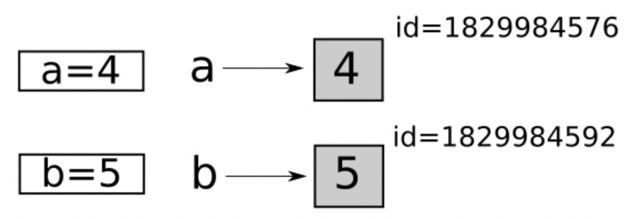
 
 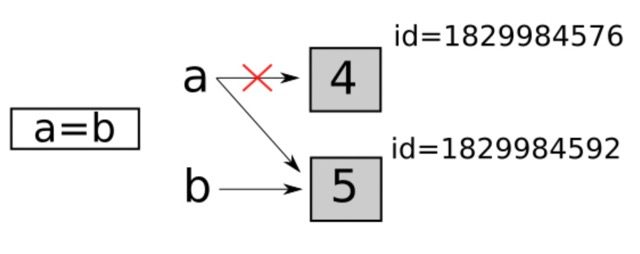

Когда мы на входе функции принимали аргумент history, мы по факту принимали указатель на список, который уже заранее был создан. Вызывая .append(), мы изменяли список «на месте» — добавляли элемент в тот же объект. 

После такого объект, на который ссылается history, изменяется навсегда — он был [50, 40], а становится [50, 40, 4] И следующий вызов функции уже будет получать на вход ссылку, указывающую на список [50, 40, 4].

Когда же мы делали .copy(), то фактически создавали новый объект в другом месте памяти, куда ушли все значения из history, и делали все изменения в новом объекте. Когда функция can_purchase завершилась, копия history уничтожилась — в конце выполнения функции все созданные в ней переменные уничтожаются.
[Подробнее](https://devpractice.ru/python-lesson-3-data-model/)

### Изменяемые и неизменяемые типы данных

В Python существуют изменяемые и неизменяемые типы данных.

`Изменяемые типы` — под изменяемыми понимают типы, объекты которых могут быть изменены на месте.

`Неизменяемые типы` не дают себя менять, какими их создали в памяти, такими они и останутся до конца.
<p> <br> </p>

#### > Неизменяемые типы данных

In [49]:
"""Целые числа (int)""" 
k = 15
print(f'{type(k)} {id(k)}') # неизменяемый тип

<class 'int'> 140295042433712


In [116]:
x = 10
print(f'{type(x)} {id(x)}')
x = 15
print(f'{type(x)} {id(x)}') # по факту , при изменении значения, мы создали новый объект

<class 'int'> 140295042433552
<class 'int'> 140295042433712


In [92]:
"""Строки (str)"""

my_str = 'Anton'
sn = 'Bogdanov'
print(f'{type(my_str)} {id(my_str)}') 
my_str = my_str + sn
print(f'{type(my_str)} {id(my_str)}') 

<class 'str'> 140294096909360
<class 'str'> 140294096897776


In [85]:
"""Кортежи (tuple)"""

tuple1 = (1, 2, 3, 4)
print(tuple1, type(tuple1), id(tuple1))
tuple1 = (1, 2, 3, 4) + (5, 6, 7)
print(tuple1, type(tuple1), id(tuple1))

(1, 2, 3, 4) <class 'tuple'> 140294094200144
(1, 2, 3, 4, 5, 6, 7) <class 'tuple'> 140294092136864


#### Изменяемые типы данных

Списки (list)

In [115]:
x_list = ['Яблоко', 'Груша', 'Слива']
x_list[1] = 'Ананас'
x_list

['Яблоко', 'Ананас', 'Слива']

#### Словари (dict)

Словари — часто используемый тип данных в Python. Давайте посмотрим на их изменчивость.

Определим словарь под именем dict с тремя ключами и их значениями. Когда мы распечатаем его, отобразится все его содержимое. Можно распечатать каждое значение словаря отдельно, а также использовать ключи вместо индексов. 

In [94]:
dict = {'Name':'Алиса', 'Age':27, 'Job':'Senior Python Developer'}
dict

{'Name': 'Алиса', 'Age': 27, 'Job': 'Senior Python Developer'}

In [95]:
dict['Name'], dict['Age'], dict['Job']

('Алиса', 27, 'Senior Python Developer')

In [96]:
"""изменим какое-нибудь значение в нашем словаре."""
dict['Name'] = 'Роберт'
"""Выведем обновленный словарь. Значение изменилось. При этом сами ключи словаря неизменяемы."""
dict

{'Name': 'Роберт', 'Age': 27, 'Job': 'Senior Python Developer'}

### > Хэш функции

Есть еще одна причина, почему неизменяемость важна. Для всех встроенных в Python неизменяемых объектов можно подсчитать хэш. Это свойство называется _hashable_, т.е. верно утверждение "tuple is hashable".

Хэш — это некая функция, которая берет на вход объект и считает одно число, причем для разных объектов это число разное. У хэш-функции есть два главных свойства:

    Она быстро считается.
    При малейшем изменении объекта значение хэш-функции меняется лавинообразно.

Хэш-функции позволяют организовать быстрый поиск и быстрое обращение по элементу, поэтому их использует «под капотом» словарь и множество. Собственно, из-за этого ключом в словаре не может выступать изменяемый объект (например, list) — для него нельзя подсчитать хэш. В прошлом уроке это просто проговорили, теперь же мы знаем причину.

Функция `hash()` возвращает хеш-значение объекта, если оно есть. Хэш-значения являются целыми числами.

In [119]:
print(hash(tuple1))
print(hash(x), hash(k))
# print(hash(x_list)) не посчитает хэш т.к list изменяемый объект


316559433289985030
15 15
